In [4]:
import numpy as np
import matplotlib.pyplot as plt

---

you should really use this class and look it up in the documentation


https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html



In [5]:
P = np.poly1d([1,1])
print(P)

 
1 x + 1


---

# Lagrange polynomials

In [160]:

def L_i(X):
    '''calculate the Lagrange polys'''
    L = []
    for i, x_i in enumerate(X):
        P = np.poly1d([1])
        for j, x_j in enumerate(X):
            if i == j : continue
            P *= np.poly1d([1, - x_j ])/( x_i - x_j)
        L.append(P)
        
    return L

# Fit to function

In [161]:
X = np.arange(5)
L = L_i(X)

# you can change the function here
f = np.cos
#calculate the approximation
fit = sum([ y*p for y, p  in zip(f(X),L)])
# you really do need this as fit is only a np.array
fit = np.poly1d(fit)

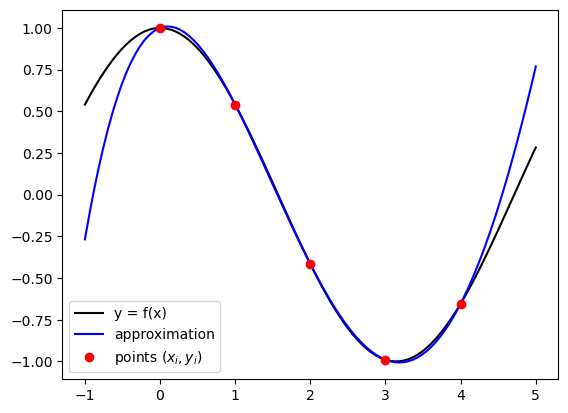

In [172]:
T = np.linspace(-1,5,100)
plt.plot(T, f(T),'k', label = "y = f(x)" )
plt.plot(T, fit(T),'b', label = "approximation");
plt.plot(X, f(X),'ro', label = "points $(x_i,y_i)$");

plt.legend(loc='lower left');

---

# Newton’s Polynomial Interpolation


I tried doing this by myself but 
then I got tired and I got the code from 
[here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html)

In [91]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros((n, n))
    
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j] - x[i])
            
    return coef


def eval_poly(diff_table, 
                X, 
                x):
    '''
    evaluate the newton polynomial at x
    '''
 
    coeffs = diff_table[0]
    
    #it's like horner
    P = 0 
    # I corrected this
    for k  in range(-1, -len(X)-1, -1):
        P =  (x - X[k])*P + coeffs[k]
        
    return P

# then I made this to check

def diffs2poly(diff_table, 
                X):
    '''
    calculate the interpolating polynomial
    '''
    
    coeffs = diff_table[0]   
    P = 0
    # going backwards so -1
    for k  in range(-1, -len(X)-1, -1):
        P =  np.poly1d([1, - X[k]])*P + coeffs[k]
    return np.poly1d(P)

---

# Example exo 1

In [92]:
# I think I coped and pasted from the pdf

X, Y = list(zip(* [(1, 3), (2, 2), (4, 1), (5, 4)]))

divided_diff(X,Y)

array([[ 3.        , -1.        ,  0.16666667,  0.25      ],
       [ 2.        , -0.5       ,  1.16666667,  0.        ],
       [ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        ,  0.        ]])

In [93]:
diffs = divided_diff(X, Y)
newton = diffs2poly(diffs, X)
print(newton)

      3         2
0.25 x - 1.583 x + 2 x + 2.333


you get the same polynomial as with Lagrange
it's unique !!!!

In [94]:
L = L_i(X)

fit = sum([ y*p for y, p  in zip(Y,L)])
# you really do need this as fit is only a np.array
fit = np.poly1d(fit)
print(fit)

      3         2
0.25 x - 1.583 x + 2 x + 2.333


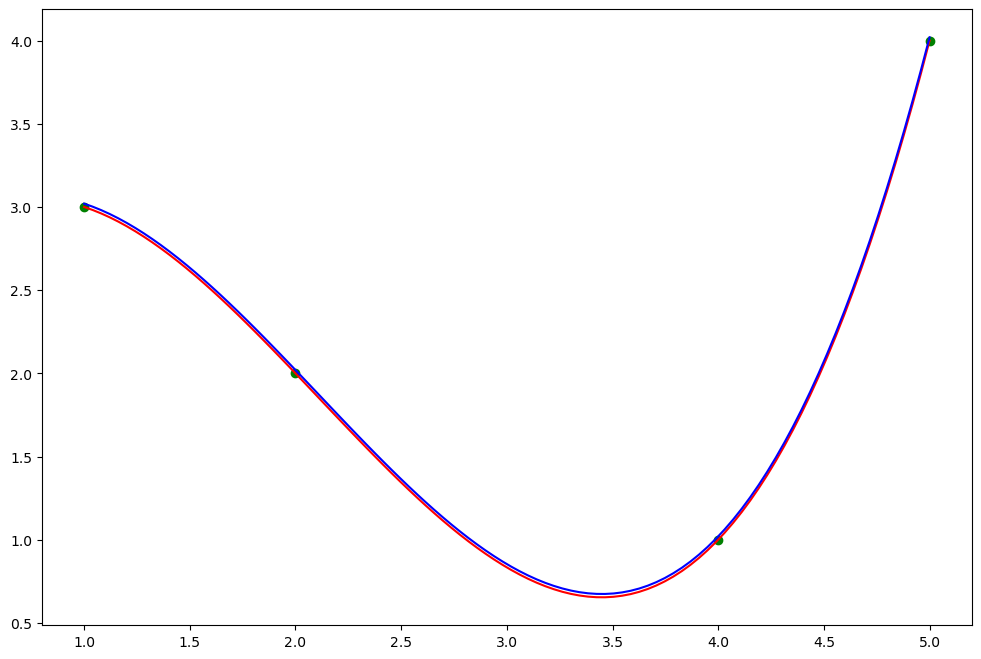

In [95]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y, 'go')

# evaluate on new data points
xs =  np.linspace(1,5,100)
plt.plot(xs, newton(xs),'r');
plt.plot(xs, fit(xs)+.02,'b');

---

# Runge

[compare with this](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

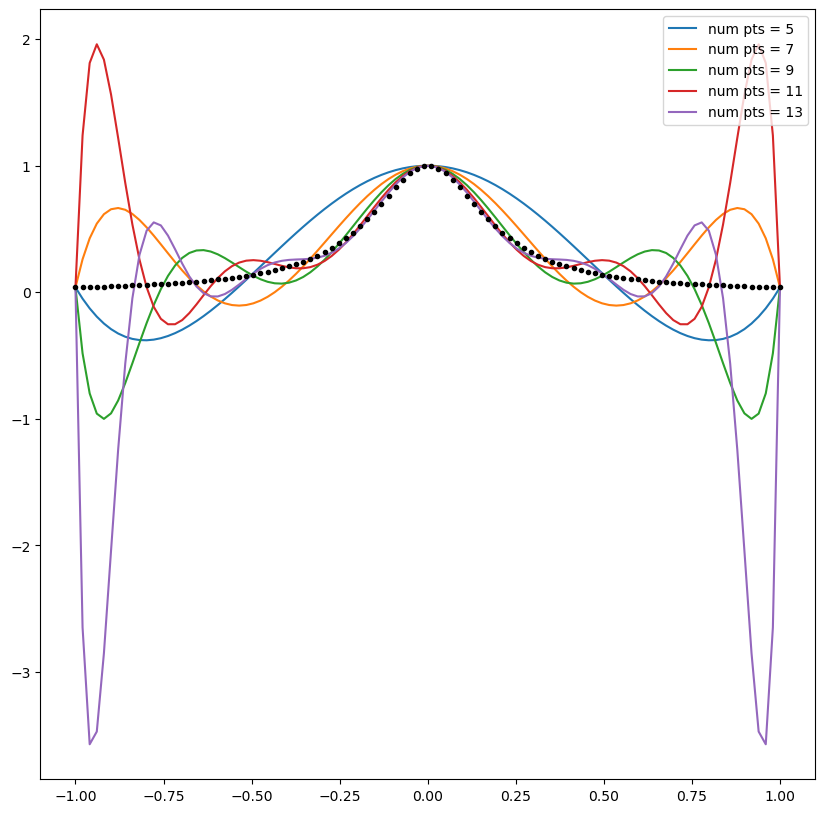

In [96]:
fig, ax  = plt.subplots(1, figsize=(10, 10))

#ax.set_aspect('equal')

x_ref = np.linspace(-1,1,100)

for N in range(5,15,2):
    
    X = np.linspace(-1,1,N)
    Y = 1/(1 + 25*X**2)
    
    P = diffs2poly(divided_diff(X, Y),X) 
    # display the graph 
    ax.plot(x_ref, P(x_ref), label=f'num pts = {N}')
    
ax.legend(loc='upper right')
    
X = x_ref
Y = 1/(1 + 25*X**2)
ax.plot(X, Y,'k.');

In [ ]:
import numpy as np

In [ ]:
n = 2
A = np.ones((2,2))
A[0,0] = 2
A[1,1] = 0
A

array([[2., 1.],
       [1., 0.]])

In [ ]:
def char_poly(A):
    n = A.shape[0]
    T  = np.linspace(0,1,n+1)
    Y = [ np.linalg.det( t*np.identity(n) - A) for t in T ]
    return np.polyfit(T, Y, deg=n)

char_poly(A)

array([ 1.        , -0.79267538, -1.59270732, -1.18212572, -0.26570032,
        0.00555723])

In [ ]:
n = 5
A = np.random.random((n,n))
char_poly(A)

array([ 1.        , -0.79267538, -1.59270732, -1.18212572, -0.26570032,
        0.00555723])